In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Ciudadanía']

# Generar datos aleatorios para 100 estudiantes
num_students = 100
data = []

for _ in range(num_students):
    nombre = f"Nombre_{_}"
    apellido = f"Apellido_{_}"
    dni = random.randint(10000000, 99999999)  # DNI aleatorio de 8 dígitos

    for materia in materias:  # Cada estudiante cursa todas las materias
        nota1 = np.random.randint(1, 11)  # Nota aleatoria del 1 al 10
        nota2 = np.random.randint(1, 11)
        nota3 = np.random.randint(1, 11)
        faltas = np.random.randint(0, 20)  # Faltas aleatorias de 0 a 20

        data.append([nombre, apellido, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Nombre', 'Apellido', 'DNI', 'Materia', 'Nota_1er_Trimestre', 'Nota_2do_Trimestre', 'Nota_3er_Trimestre', 'Faltas_a_clases'])

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

     Nombre    Apellido       DNI              Materia  Nota_1er_Trimestre  \
0  Nombre_0  Apellido_0  50570171           Matemática                   4   
1  Nombre_0  Apellido_0  50570171  Lengua y Literatura                   8   
2  Nombre_0  Apellido_0  50570171             Historia                   4   
3  Nombre_0  Apellido_0  50570171            Geografía                   6   
4  Nombre_0  Apellido_0  50570171   Ciencias Naturales                   4   
5  Nombre_0  Apellido_0  50570171     Educación Física                   9   
6  Nombre_0  Apellido_0  50570171               Inglés                   2   
7  Nombre_0  Apellido_0  50570171               Física                   4   
8  Nombre_0  Apellido_0  50570171              Química                   1   
9  Nombre_0  Apellido_0  50570171             Biología                   6   

   Nota_2do_Trimestre  Nota_3er_Trimestre  Faltas_a_clases  
0                   1                   9               16  
1                  

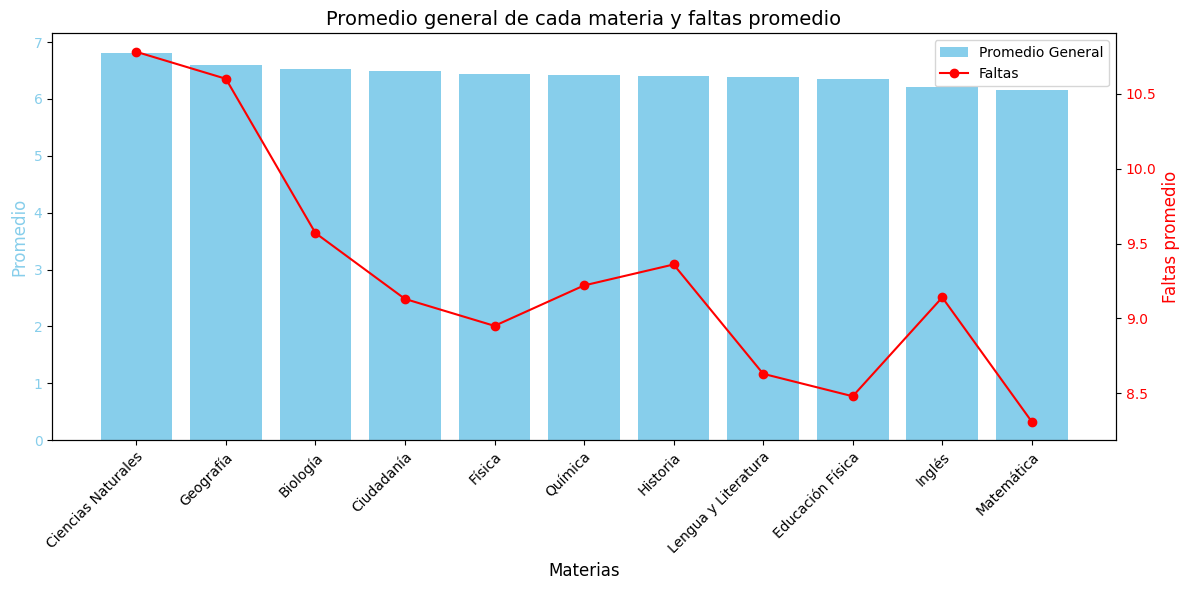

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_por_materia = df.groupby('Materia').agg({'Nota_1er_Trimestre': 'mean', 'Nota_2do_Trimestre': 'mean', 'Nota_3er_Trimestre': 'mean', 'Faltas_a_clases': 'mean'})
promedios_por_materia['Promedio_General'] = promedios_por_materia.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedios_por_materia = promedios_por_materia.sort_values('Promedio_General', ascending=False)


# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras del promedio general
ax1.bar(promedios_por_materia.index, promedios_por_materia['Promedio_General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materias', fontsize=12)
ax1.set_ylabel('Promedio', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')


# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(promedios_por_materia.index, promedios_por_materia['Faltas_a_clases'], color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas promedio', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Agregar título y leyendas
plt.title('Promedio general de cada materia y faltas promedio', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

In [3]:
# prompt: df.to_csv("datos_alumnos.csv", index=False)

df.to_csv("datos_alumnos.csv", index=False)
